<h1 style="text-align : center"> <font color="red" size=8>BAGGING ENSEMBLE</h1>

## <font color="dark blue">WHAT IS BAGGING ENSEMBLE?
- Bagging stands for __Boostrap Sampling__.
- In Bagging Ensemble we train multiple models(multiple decision tree, multiple svm) in different subset of dataset in parallely.
- In Bagging the Models are independent of each other.
- The final prediction is made by aggregating the predictions of the all-base model using majority voting.
- In the models of regression, the final prediction is made by averaging the predictions of the all-base model.

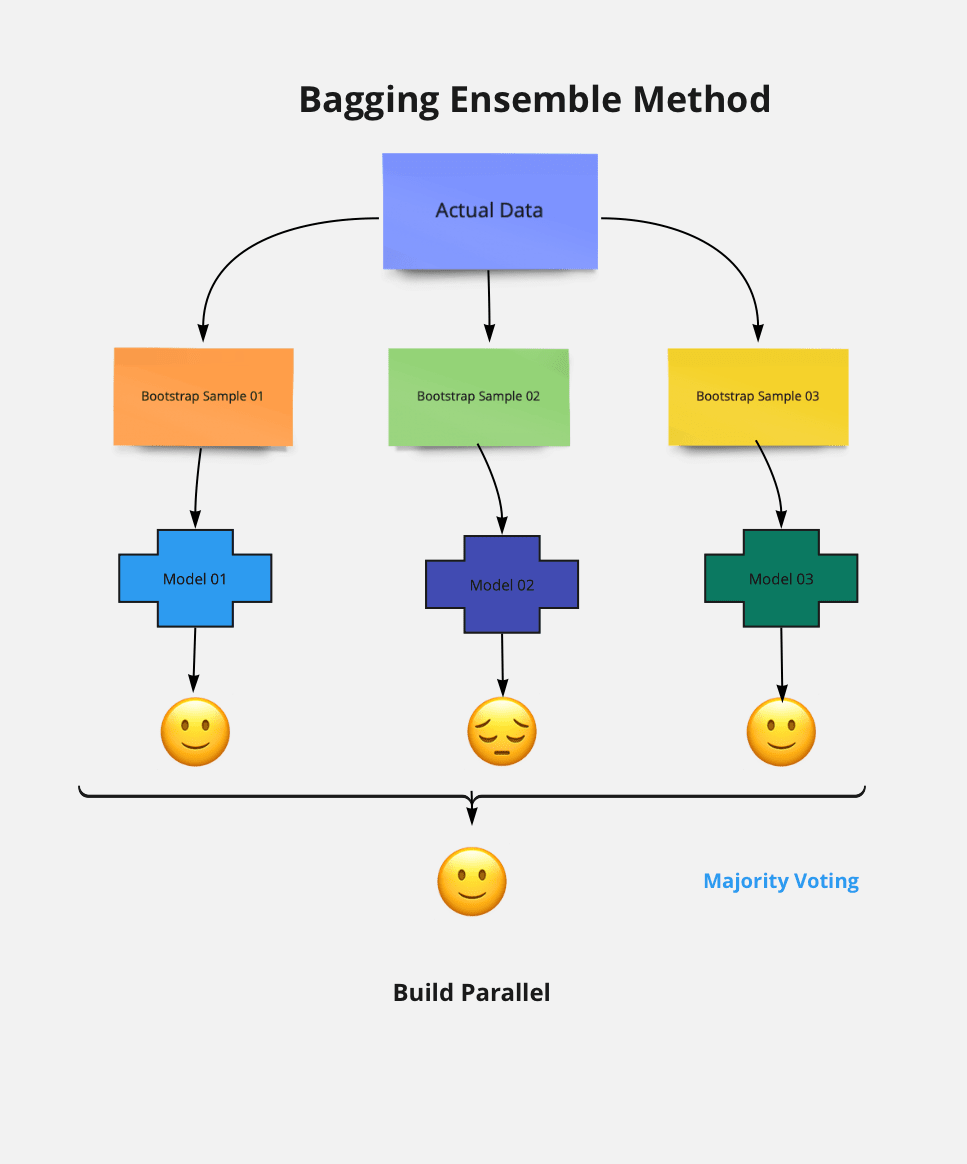

## <font color="dark blue"> HOW BAGGING ENSEMBLE WORKS?
__1. Bootstrap Sampling__: In Bootstrap Sampling randomly ‘n’ subsets of original training data are sampled with replacement. This step ensures that the base models are trained on diverse subsets of the data, as some samples may appear multiple times in the new subset, while others may be omitted. It reduces the risks of overfitting and improves the accuracy of the model.


``` Let's break it down step by step:
Original training dataset: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Resampled training set 1: [2, 3, 3, 5, 6, 1, 8, 10, 9, 1]
Resampled training set 2: [1, 1, 5, 6, 3, 8, 9, 10, 2, 7] 
Resampled training set 3: [1, 5, 8, 9, 2, 10, 9, 7, 5, 4]  ```


__1.1. PASTING__: In this case randomly ‘n’ subsets of original training data are sampled without replacement.
    
__2. Base Model Training__: In bagging, multiple base models are used. After the Bootstrap Sampling, each base model is independently trained using a specific learning algorithm, such as decision trees, support vector machines, or neural networks on a different bootstrapped subset of data. These models are typically called “Weak learners” because they may not be highly accurate on their own. Since the base model is trained independently of different subsets of data. To make the model computationally efficient and less time-consuming, the base models can be trained in parallel.

    
__3. Aggregation__: Once all the base models are trained, it is used to make predictions on the unseen data i.e. the subset of data on which that base model is not trained. In the bagging classifier, the predicted class label for the given instance is chosen based on the majority voting. The class which has the majority voting is the prediction of the model.
 
    
__4. Out-of-Bag (OOB) Evaluation__: Some samples are excluded from the training subset of particular base models during the bootstrapping method. These “out-of-bag” samples can be used to estimate the model’s performance without the need for cross-validation.
    

__5. Final Prediction__: After aggregating the predictions from all the base models, Bagging produces a final prediction for each instance

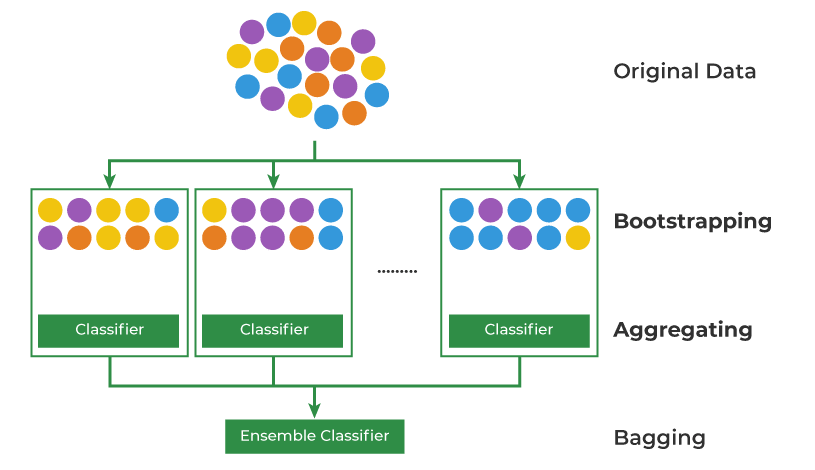

## <font color="blue">BAGGING CLASSIFIER

In [1]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
X,y = make_classification(n_samples=10000, n_features=10,n_informative=3)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy",accuracy_score(y_test,y_pred))

Decision Tree accuracy 0.916


In [5]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

In [6]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=500, random_state=42)

In [7]:
y_pred = bag.predict(X_test)

In [8]:
accuracy_score(y_test,y_pred)

0.9485

In [9]:
bag.estimators_samples_[0].shape

(4000,)

In [10]:
bag.estimators_features_[0].shape

(10,)

 ## <font color="GREEN">PASTING

In [11]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=False,
    random_state=42,
    verbose = 1,
    n_jobs=-1
)

In [12]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Pasting classifier",accuracy_score(y_test,y_pred))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    5.3s remaining:   16.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    5.8s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.2s


Pasting classifier 0.948


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished


## <font color="GREEN">OOB SCORE  

In [13]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    oob_score=True,
    random_state=42
)
  

In [14]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, oob_score=True, random_state=42)

In [15]:
bag.oob_score_

0.946

In [16]:
y_pred = bag.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.948


### 

## <font color="blue">BAGGING REGRESSOR

In [17]:
from sklearn import datasets

boston = datasets.load_boston()
X_boston, Y_boston = boston.data, boston.target
print('Dataset features names : '+ str(boston.feature_names))
print('Dataset features size : '+ str(boston.data.shape))
print('Dataset target size : '+ str(boston.target.shape))

Dataset features names : ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Dataset features size : (506, 13)
Dataset target size : (506,)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston , train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sets Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
     

Train/Test Sets Sizes :  (404, 13) (102, 13) (404,) (102,)


In [20]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [21]:
lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [22]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [23]:
print("R^2 score for LR",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for KNN",r2_score(Y_test,y_pred3))

R^2 score for LR 0.6592466510354087
R^2 score for DT 0.4476983043806172
R^2 score for KNN 0.5475962186976784


In [24]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

BaggingRegressor(random_state=1)

In [25]:
Y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Training Coefficient of R^2 : 0.980
Test Coefficient of R^2 : 0.818


In [26]:
%%time

n_samples = boston.data.shape[0]
n_features = boston.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.983
Test R^2 Score : 0.805
Best R^2 Score Through Grid Search : 0.871
Best Parameters :  {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
Wall time: 20.1 s


## <font color="purple">PARAMETERS OF BAGGING CLASS 

__1. estimator__:
- The base model to be used for each individual model in the ensemble. Common choices include Decision Trees, Support Vector Machines, or Neural Networks.

__2. n_estimators__:
- The number of base estimators (models) to be created. More estimators generally lead to better performance, but also increase computational cost.

__3. max_samples__:
- The maximum number of samples to draw from the training set for each base estimator. This can be a number or a fraction of the total samples.

__4. max_features__:
- The maximum number of features to consider for each split in a decision tree. This can be a number or a fraction of the total features.

__5. bootstrap__:
- Whether to use bootstrap sampling to create different subsets of the training data for each base estimator. This is typically set to True.

__6. bootstrap_features__:
- Whether to randomly select features for each base estimator. This can be useful for reducing overfitting.

__7. oob_score__:
- Whether to compute the out-of-bag (OOB) score. The OOB score is the accuracy of the model on samples that were not used to train a particular base estimator.

__8. warm_start__:
- Whether to reuse the solution of the previous call to fit and add more estimators to the ensemble. This can be useful for incremental learning.

__9. n_jobs__:
- The number of CPU cores to use for parallel processing. A higher value can speed up training and prediction.

__10. random_state__:
- The seed used by the random number generator. This can be useful for reproducibility.

__11. verbose__:
- Controls the verbosity of the output. A higher value provides more detailed information during training and prediction.

### 

# <font color="dark blue">DIFFERENCE BETWEEN BAGGING & BOOSTING

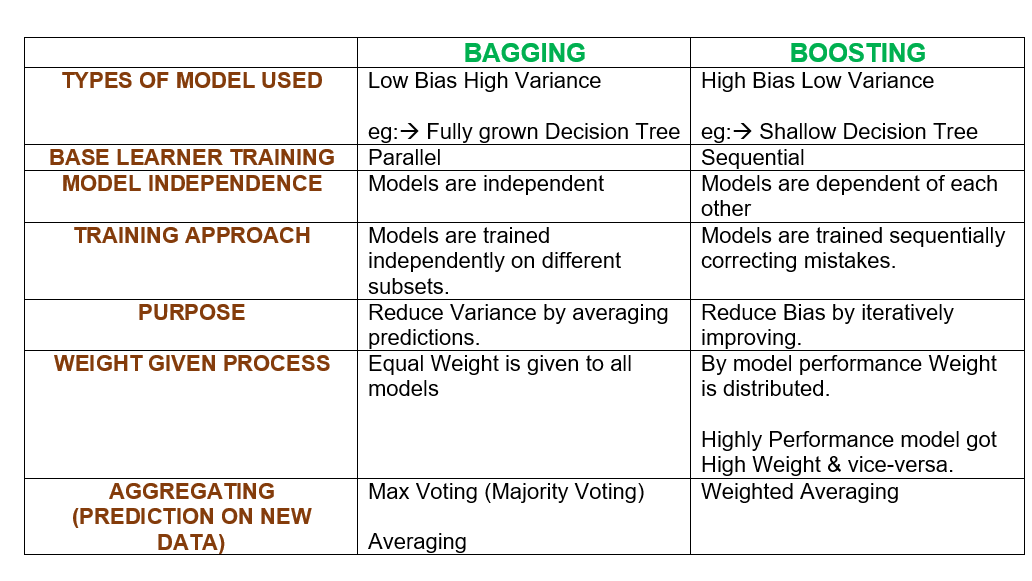